## IXI Dataset Exploration

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from copy import deepcopy
from rich import inspect
from tqdm import tqdm

# monai
from monai.data import ImageDataset, ThreadDataLoader

# sys path append
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))


In [2]:
# ttk
from ttk import repl
from ttk.config import (
    set_hydra_configuration,
    Configuration,
    DatasetConfiguration,
    JobConfiguration,
)
from ttk.utils import login

In [3]:
repl.install(show_locals=False)

### Constant setup

In [4]:
# configs
config_name = "tests"
config_path = "../configs/"
config_dir = os.path.abspath(config_path)


In [5]:
cfg: Configuration = set_hydra_configuration(
        config_name=config_name,
        init_method_kwargs={"config_dir": config_dir},
        ConfigurationInstance=Configuration,
    )
dataset_cfg: DatasetConfiguration = cfg.datasets
job_cfg: JobConfiguration = cfg.job
cfg

[14:47:23] INFO     ttk.config: Creating configuration: 'tests'[0m                                    ]8;id=223806;file:///home/nicoleg/workspaces/teddytoolkit/ttk/config.py\config.py]8;;\:]8;id=582970;file:///home/nicoleg/workspaces/teddytoolkit/ttk/config.py#214\214]8;;\


Configuration(
    index='IXI_ID',
    target='SEX_ID (1=m, 2=f)',
    date='2023-08-16',
    timestamp='14-47-24',
    datasets={'extension': '.nii.gz', 'patient_data': '/home/nicoleg/workspaces/dissertation/data/ixi/IXI.xls', 'scan_data': '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/', 'instantiate': {'_target_': 'monai.data.ImageDataset'}, 'dataloader': {'_target_': 'torch.utils.data.DataLoader', 'batch_size': 1, 'num_workers': 24}, 'transforms': {'load': [{'_target_': 'monai.transforms.EnsureChannelFirst', 'channel_dim': 'no_channel'}, {'_target_': 'monai.transforms.EnsureType', 'track_meta': True}, {'_target_': 'monai.transforms.Resize', 'spatial_size': [96, 96, 96]}], 'train': [{'_target_': 'monai.transforms.RandFlip', 'spatial_axis': [0, 1, 2], 'prob': 0.5}, {'_target_': 'monai.transforms.RandRotate90', 'prob': 0.5, 'max_k': 3}, {'_target_': 'monai.transforms.RandAdjustContrast', 'prob': 1.0, 'gamma': [1.0, 2]}]}},
    ignite={'score_name': 'accuracy', 'use_check

In [6]:
index_name = cfg.index
target_name = cfg.target

In [7]:
patient_path = dataset_cfg.patient_data
patient_path

'/home/nicoleg/workspaces/dissertation/data/ixi/IXI.xls'

In [8]:
patient_df = pd.read_excel(patient_path).set_index(index_name)
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 1 to 662
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SEX_ID (1=m, 2=f)  619 non-null    int64         
 1   HEIGHT             619 non-null    int64         
 2   WEIGHT             619 non-null    int64         
 3   ETHNIC_ID          619 non-null    int64         
 4   MARITAL_ID         619 non-null    int64         
 5   OCCUPATION_ID      619 non-null    int64         
 6   QUALIFICATION_ID   619 non-null    int64         
 7   DOB                616 non-null    object        
 8   DATE_AVAILABLE     619 non-null    int64         
 9   STUDY_DATE         593 non-null    datetime64[ns]
 10  AGE                590 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 58.0+ KB


In [9]:
patient_df.head()

,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
IXI_ID,,,,,,,,,,,
1,1,170,80,2,3,5,2,1968-02-22,0,NaT,NaN
2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [10]:
scan_path = dataset_cfg.scan_data
scan_path

'/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/'

In [11]:
scan_paths = [os.path.join(scan_path, f) for f in os.listdir(scan_path)]
filter_func = lambda x: x.split('/')[-1]
exclude = ["_mask.nii.gz"]

In [12]:
matching_scan_paths = [
    scan_path
    for scan_path in scan_paths
    if filter_func(scan_path) and not any(x in scan_path for x in exclude)
]
matching_scan_paths[:5]


[
    '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/IXI310-IOP-0890-T2.nii.gz',
    '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/IXI237-Guys-1049-T2.nii.gz',
    '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/IXI354-HH-2024-T2.nii.gz',
    '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/IXI109-Guys-0732-T2.nii.gz',
    '/home/nicoleg/workspaces/dissertation/data/ixi/t2_stripped/IXI061-Guys-0715-T2.nii.gz'
]

In [13]:
dataset = ImageDataset(matching_scan_paths, transform=None)
len(dataset)

578

In [14]:
index = 512
scan = dataset[index]
scan.shape

torch.Size([256, 256, 130])

In [15]:
# scan._meta

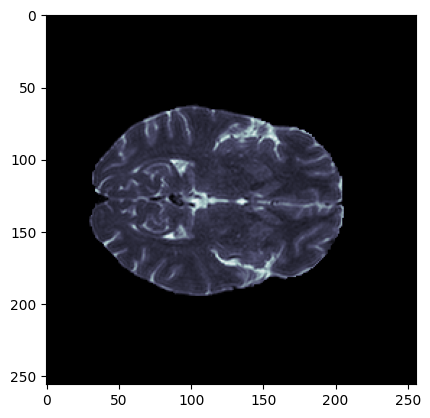

In [16]:
# display single image
depth_slice = scan.shape[2] // 2
display_scan_slice = scan[:, :, depth_slice].numpy()
plt.imshow(display_scan_slice, cmap="bone");

## Quantify average slice depth

In [17]:
dataloader = iter(ThreadDataLoader(dataset, batch_size=dataset_cfg.dataloader.batch_size, num_workers=dataset_cfg.dataloader.batch_size))
_metadata = {}
counter = {}
for scan in tqdm(dataloader, total=len(dataset)):
    meta = scan._meta
    shape = meta["spatial_shape"].numpy().tolist()[0]
    filename = meta["filename_or_obj"][0].split("/")[-1]
    patient = int(filename.split(".")[0].split("-")[0][-3:])
    # _metadata[patient] = shape
    _metadata[patient] = filename, *shape

100%|██████████| 578/578 [00:52<00:00, 11.09it/s]


In [18]:
os.listdir(scan_path)[:10]


[
    'IXI310-IOP-0890-T2.nii.gz',
    'IXI237-Guys-1049-T2.nii.gz',
    'IXI354-HH-2024-T2.nii.gz',
    'IXI109-Guys-0732-T2.nii.gz',
    'IXI410-Guys-0958-T2_mask.nii.gz',
    'IXI061-Guys-0715-T2.nii.gz',
    'IXI211-HH-1568-T2_mask.nii.gz',
    ... +3
]

In [19]:
_metadata[237]

('IXI237-Guys-1049-T2.nii.gz', 256, 256, 130)

In [20]:
metadata = pd.DataFrame.from_dict(_metadata, orient="index", columns=["filename", "H", "W", "D"]).rename_axis("IXI_ID")
metadata.head()

,filename,H,W,D
IXI_ID,,,,
310,IXI310-IOP-0890-T2.nii.gz,256,256,136
237,IXI237-Guys-1049-T2.nii.gz,256,256,130
354,IXI354-HH-2024-T2.nii.gz,256,256,130
109,IXI109-Guys-0732-T2.nii.gz,256,256,130
61,IXI061-Guys-0715-T2.nii.gz,256,256,130


In [21]:
metadata.describe()

,H,W,D
count,578.0,578.0,578.000000
mean,256.0,256.0,130.389273
std,0.0,0.0,4.982711
min,256.0,256.0,28.000000
25%,256.0,256.0,130.000000
50%,256.0,256.0,130.000000
75%,256.0,256.0,130.000000
max,256.0,256.0,136.000000


In [22]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 310 to 558
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  578 non-null    object
 1   H         578 non-null    int64 
 2   W         578 non-null    int64 
 3   D         578 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.6+ KB


### GENDER

In [23]:
patient_df = patient_df["SEX_ID (1=m, 2=f)"].rename_axis("GENDER").to_frame()
patient_df.head()

,"SEX_ID (1=m, 2=f)"
GENDER,
1,1
2,2
12,1
13,1
14,2


In [24]:
# no NA values
patient_df.notna().sum()


SEX_ID (1=m, 2=f)    619
dtype: int64

In [25]:
# no NA values
patient_df.value_counts()


SEX_ID (1=m, 2=f)
2                    342
1                    277
Name: count, dtype: int64

## General description

* There are a total of 619 subjects in the IXI dataset.
* 578 subjects have a T2 images attached to them.
* Images have an average height and width of 256x256 pixels
    * The average depth is ~130, with ~5 slice std
* IXI metadata comes with `GENDER` metadata, which allows for additional prediction task for the `Brain Tumor Dataset` as an auxilary task. There are no missing values for this column.

Check the other papers and compare the statistics of the datasets

# Using `TTK`

In [26]:
from omegaconf import DictConfig

# ttk
from ttk import datasets


def prepare_dataset(cfg: Configuration, **kwargs):
    """
    Prepare the dataset.
    """
    dataset_cfg: DatasetConfiguration = cfg.datasets
    transform = datasets.create_transforms(dataset_cfg)
    dataset = datasets.instantiate_image_dataset(
        cfg=cfg, save_metadata=True, transform=transform
    )

    dataset_cfg: DatasetConfiguration = cfg.datasets
    transforms = datasets.create_transforms(dataset_cfg)
    dataset = datasets.instantiate_image_dataset(
        cfg=cfg, transform=transforms, **kwargs
    )
    train_val_test_split_dict = datasets.instantiate_train_val_test_datasets(
        cfg=cfg, dataset=dataset
    )
    return train_val_test_split_dict

train_val_test_split_dict = prepare_dataset(cfg=cfg)


[14:48:19] INFO     ttk.datasets: Creating transforms...[0m                                          ]8;id=238351;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=34838;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#46\46]8;;\

           INFO     ttk.datasets: Building metadata dataframe. This may take a while...[0m          ]8;id=10407;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=99169;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#124\124]8;;\

100%|██████████| 578/578 [00:09<00:00, 63.22it/s]


[14:48:28] INFO     ttk.datasets: Creating transforms...[0m                                          ]8;id=829873;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=153060;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#46\46]8;;\

           INFO     ttk.datasets: Building metadata dataframe. This may take a while...[0m          ]8;id=440683;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=569000;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#124\124]8;;\

100%|██████████| 578/578 [00:09<00:00, 63.15it/s] 


[14:48:37] INFO     ttk.datasets: Creating train/val/test splits...[0m                              ]8;id=610263;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=570742;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#196\196]8;;\

           INFO     ttk.datasets: Creating transforms...[0m                                          ]8;id=485118;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=776166;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#46\46]8;;\

           INFO     ttk.datasets: Creating transforms...[0m                                          ]8;id=111985;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=14261;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#46\46]8;;\

           INFO     ttk.datasets: Train/val/test splits created.[0m                                 ]8;id=385845;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py\datasets.py]8;;\:]8;id=503543;file:///home/nicoleg/workspaces/teddytoolkit/ttk/datasets.py#244\244]8;;\

In [28]:
from ttk import models

# torch
import torch
from torch import nn

# monai
from generative.inferers import DiffusionInferer
from generative.networks.schedulers import DDPMScheduler

# ttk
from ttk.config import Configuration, ModelConfiguration, DiffusionModelConfiguration


def prepare_diffusion_models(cfg: Configuration, device: torch.device, **kwargs):
    """
    Prepare the diffusion models for training.
    """
    model_cfg: DiffusionModelConfiguration = cfg.models
    prepared_module_dict = {}
    model: nn.Module = models.instantiate_model(cfg.models, device=device, **kwargs)
    prepared_module_dict["model"] = model
    criterion = models.instantiate_criterion(model_cfg, device=device, **kwargs)
    prepared_module_dict["criterion"] = criterion
    optimizer = models.instantiate_optimizer(model_cfg, model)
    prepared_module_dict["optimizer"] = optimizer
    scheduler: DDPMScheduler = models.instantiate_diffusion_scheduler(model_cfg)
    prepared_module_dict["scheduler"] = scheduler
    inferer: DiffusionInferer = models.instantiate_diffusion_inferer(
        model_cfg=model_cfg, scheduler=scheduler
    )
    prepared_module_dict["inferer"] = inferer
    return prepared_module_dict


prepared_module_dict = prepare_diffusion_models(
    cfg, device=torch.device(job_cfg.device)
)

In [29]:
prepared_module_dict


{
    'model': DiffusionModelUNet(
  (conv_in): Convolution(
    (conv): Conv3d(1, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (time_embed): Sequential(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock(
          (norm1): GroupNorm(32, 256, eps=1e-06, affine=True)
          (nonlinearity): SiLU()
          (conv1): Convolution(
            (conv): Conv3d(256, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          )
          (time_emb_proj): Linear(in_features=1024, out_features=256, bias=True)
          (norm2): GroupNorm(32, 256, eps=1e-06, affine=True)
          (conv2): Convolution(
            (conv): Conv3d(256, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          )
          (skip_connection): Identit